In [ ]:
import math

# Calculate combinations
def combinations(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

# Correct calculation for total combinations
total_combinations = combinations(70, 45) * combinations(25, 10)
print(f"Total combinations: {total_combinations}")

In [ ]:
import h5py
import pandas as pd
import pickle
import os
from sklearn.model_selection import train_test_split

# Initialize an empty dictionary to store the data
data = {'train': [], 'val': [], 'test': []} 
path_h5 = 'dataset/'

all_tiles = []
# Iterate over all the h5 files
for fname in os.listdir(path_h5):
    if fname.endswith('.h5'):
        with h5py.File(os.path.join(path_h5, fname), 'r') as f:
            # Get the list of all tiles in the file
            all_tiles.extend(list(f.keys()))

train_tiles, test_and_val_tiles = train_test_split(all_tiles, test_size=0.35, random_state=24)
val_tile, test_tile = train_test_split(test_and_val_tiles, test_size=0.6, random_state=24)
data['val'].extend(val_tile)
data['test'].extend(test_tile)
data['train'].extend(train_tiles)

print("training tiles: ", len(data['train']), end=' ')
print(*data['train'], sep=' ', end='\n')
print("validation tiles: ", len(data['val']), end=' ')
print(*data['val'], sep=' ', end='\n')
print("testing tiles: ", len(data['test']), end=' ')
print(*data['test'], sep=' ', end='\n')
# Pickle the DataFrame and save it to a file
with open('dataset/mapping.pkl', 'wb') as f:
    pickle.dump(data, f)

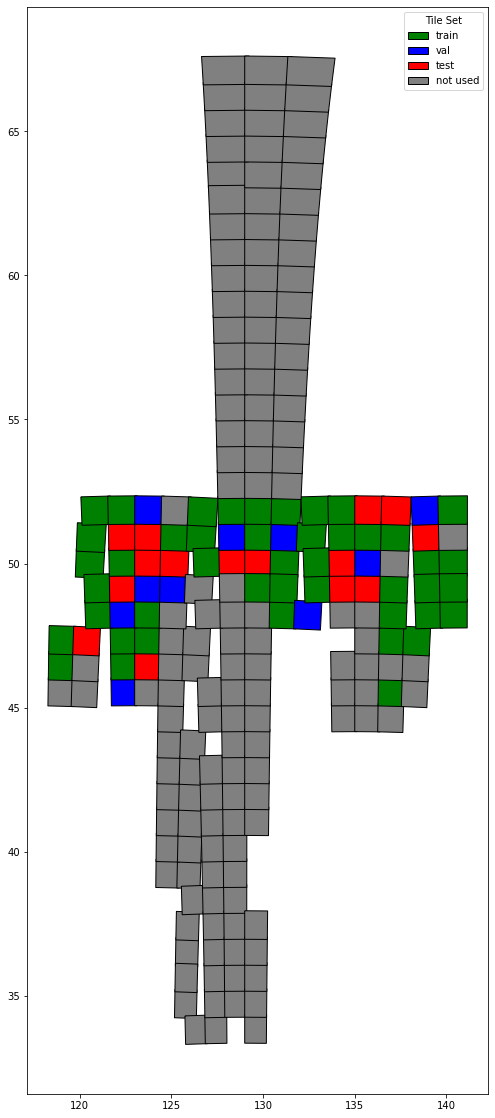

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the GeoJSON file
data = gpd.read_file('../data/S2_tiles_Siberia_polybox/S2_tiles_Siberia_all.geojson')

# Lists of tile names for each set
train_tiles = ["52UGB", "53TPN", "54UVV", "51UYT", "51UYS", "53TPL", "54UVU", "51UUP", "53ULT", "53UMT", "52UFC", "54UUV", "52UFV", "51TVM", "54UVC", "52UEB", "53ULQ", "51UUT", "50TPS", "52UCA", "52UDC", "53TQN", "53UNS", "51UXS", "51TVN", "53UPP", "51TWN", "52UFU", "54UUA", "53UMS", "53UPQ", "51UUQ", "51UWP", "52UEV", "53ULR", "50UQB", "51UVR", "53UPS", "52UFA", "50TPT", "54UVA", "51UVT", "54UUU", "50UQA", "52UEC"]
val_tiles = ["51UVP", "51TVL", "52UDB", "52UFB", "54UUC", "53UNR", "51UWT", "51UWQ", "52UGU", "51UXQ"]
test_tiles = ["51UWS", "51UVS", "52UEA", "51UWR", "54UUB", "53UNQ", "53UNT", "53UMQ", "51TWM", "51UXR", "51UVQ", "53UMR", "50TQT", "53UPT", "52UDA"]

# Initialize a new column for the classification
data['set'] = 'not used'

# Assign the classification based on the tile names
data.loc[data['Name'].isin(train_tiles), 'set'] = 'train'
data.loc[data['Name'].isin(val_tiles), 'set'] = 'val'
data.loc[data['Name'].isin(test_tiles), 'set'] = 'test'

# Define colors for each set
color_map = {
    'train': 'green',
    'val': 'blue',
    'test': 'red',
    'not used': 'gray'  # Assuming you want a default color for tiles not used
}

# Map the 'set' column to colors
data['color'] = data['set'].map(color_map)

# Plot the polygons with the specified colors and black edges
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
data.plot(color=data['color'], ax=ax, legend=True, edgecolor='black')

# Custom legend (since the default legend will not reflect our custom colors)
from matplotlib.patches import Patch
legend_labels = [Patch(facecolor=color, edgecolor='black', label=label) for label, color in color_map.items()]
plt.legend(handles=legend_labels, title='Tile Set')

plt.show()